In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import re
from tqdm.auto import tqdm

In [2]:
pd.set_option('display.max_colwidth', None)

### Read the train dataset

In [3]:
#0=non_offensive, 1=offensive
train_tweets=pd.read_csv('../data/Dataset 1/train.csv', encoding="utf-8")
train_tweets

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððððððâ¤ï¸
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher
31959,31960,0,listening to sad songs on a monday morning otw to work is sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary, #wso condemns act"


In [4]:
#have 31,962 tweets in the training dataset
train_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
#count of non_offensive (0) and offensive (1) tweets
train_tweets['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [6]:
#count of tweets in terms of percentage 
#we have 92% non_offensive and 7% offensive
train_tweets['label'].value_counts(normalize=True)

0    0.929854
1    0.070146
Name: label, dtype: float64

Text(0.5, 1.0, 'Distribution of label')

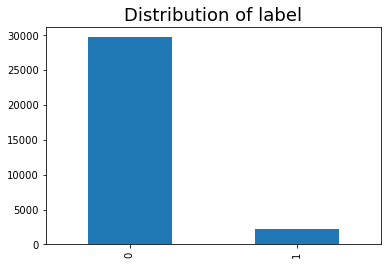

In [7]:
#plot the distribution of plots
train_tweets['label'].value_counts().plot(kind='bar')
plt.title("Distribution of label", size=18)

### Clean the tweets

In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))

from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

import string

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vahidehrasekhi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
def preprocess_tweets(tweet):
    
    #Remove special characters, numbers, punctuations (except for #)
 tweet = re.sub('[^A-Za-z0-9]+', ' ', tweet)

 # Remove user @ references 
 tweet = re.sub(r'\@\w+','', tweet)

 # Remove urls and the word user
 tweet = re.sub(r'http\S+|www\S+|https\S+|(user)+', '', tweet, flags=re.MULTILINE)

 # Remove punctuations
 tweet = tweet.translate(str.maketrans('', '', string.punctuation))

 #Remove the word 'user' at the begining of the sentence (occurs once or twice)
 #tweet = re.sub(r'(user|http)', '', tweet)

 #Using TweetTokenizer from NLTK, tokenize the tweets into individual terms.
 tk = TweetTokenizer()
       
 tweet_tokens = tk.tokenize(tweet)

    
 # Remove stopwords
        
 filtered_tweets = [w for w in tweet_tokens if not w in stop_words]

 # Remove redundant terms like ‘amp’, ‘rt’, etc.
 filtered_tweets_final = [w for w in filtered_tweets if not w in ('amp', 'rt')]

 return " ".join(filtered_tweets_final)



In [10]:
train_tweets.tweet=train_tweets['tweet'].apply(preprocess_tweets)
train_tweets

,id,label,tweet
0,1,0,father dysfunctional selfish drags kids dysfunction run
1,2,0,thanks lyft credit use cause offer wheelchair vans pdx disapointed getthanked
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation
...,...,...,...
31957,31958,0,ate isz youuu
31958,31959,0,see nina turner airwaves trying wrap mantle genuine hero like shirley chisolm shame imwithher
31959,31960,0,listening sad songs monday morning otw work sad
31960,31961,1,sikh temple vandalised calgary wso condemns act


In [11]:
 # Lower caseing the tweets 
train_tweets['tweet']=train_tweets['tweet'].str.lower()
train_tweets

,id,label,tweet
0,1,0,father dysfunctional selfish drags kids dysfunction run
1,2,0,thanks lyft credit use cause offer wheelchair vans pdx disapointed getthanked
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation
...,...,...,...
31957,31958,0,ate isz youuu
31958,31959,0,see nina turner airwaves trying wrap mantle genuine hero like shirley chisolm shame imwithher
31959,31960,0,listening sad songs monday morning otw work sad
31960,31961,1,sikh temple vandalised calgary wso condemns act


In [12]:
#lemmatizing tweets
lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
    tweet = [lemmatizer.lemmatize(word) for word in data]
    return data

In [13]:
train_tweets['tweet'] = train_tweets['tweet'].apply(lambda x: lemmatizing(x))
train_tweets

,id,label,tweet
0,1,0,father dysfunctional selfish drags kids dysfunction run
1,2,0,thanks lyft credit use cause offer wheelchair vans pdx disapointed getthanked
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation
...,...,...,...
31957,31958,0,ate isz youuu
31958,31959,0,see nina turner airwaves trying wrap mantle genuine hero like shirley chisolm shame imwithher
31959,31960,0,listening sad songs monday morning otw work sad
31960,31961,1,sikh temple vandalised calgary wso condemns act


In [14]:
#adding a new column to show length of each tweet and word count
train_tweets['length']= train_tweets['tweet'].apply(len)
train_tweets['count'] = train_tweets['tweet'].str.findall(r'(\w+)').str.len()
train_tweets.head()

,id,label,tweet,length,count
0,1,0,father dysfunctional selfish drags kids dysfunction run,55,7
1,2,0,thanks lyft credit use cause offer wheelchair vans pdx disapointed getthanked,77,11
2,3,0,bihday majesty,14,2
3,4,0,model love u take u time ur,27,7
4,5,0,factsguide society motivation,29,3


In [15]:
#checking to see if we have tweets with 0 character 
train_tweets[train_tweets['length']==0]

,id,label,tweet,length,count
1961,1962,0,,0,0
3351,3352,0,,0,0
3982,3983,0,,0,0
4799,4800,0,,0,0
5028,5029,0,,0,0
5235,5236,0,,0,0
5309,5310,0,,0,0
7222,7223,0,,0,0
7939,7940,0,,0,0
9034,9035,0,,0,0


In [16]:
#replacing all 0 with nan

#train_tweets['length']= train_tweets['length'].replace(0, np.nan)

#dropping all nans
#train_tweets= train_tweets.dropna(how='all', axis=0)
#train_tweets

In [17]:
#removing tweets with 0 length (11 tweets)
train_tweets=train_tweets[train_tweets['length']>=1]
train_tweets


,id,label,tweet,length,count
0,1,0,father dysfunctional selfish drags kids dysfunction run,55,7
1,2,0,thanks lyft credit use cause offer wheelchair vans pdx disapointed getthanked,77,11
2,3,0,bihday majesty,14,2
3,4,0,model love u take u time ur,27,7
4,5,0,factsguide society motivation,29,3
...,...,...,...,...,...
31957,31958,0,ate isz youuu,13,3
31958,31959,0,see nina turner airwaves trying wrap mantle genuine hero like shirley chisolm shame imwithher,93,14
31959,31960,0,listening sad songs monday morning otw work sad,47,8
31960,31961,1,sikh temple vandalised calgary wso condemns act,47,7


array([[<AxesSubplot:title={'center':'length'}>]], dtype=object)

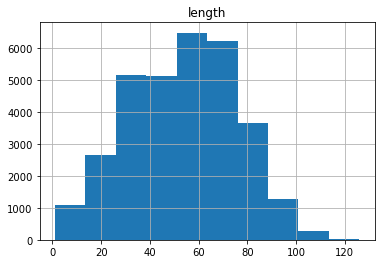

In [18]:
#plotting the distribution of length of tweets
train_tweets.hist(column='length')

In [19]:
#average tweet has 53 characters
train_tweets['length'].describe()

count    31930.000000
mean        53.399530
std         22.114556
min          1.000000
25%         36.000000
50%         55.000000
75%         70.000000
max        126.000000
Name: length, dtype: float64

In [20]:
#average word count in tweets is 7
train_tweets['count'].describe()

count    31930.000000
mean         7.909959
std          3.319934
min          1.000000
25%          5.250000
50%          8.000000
75%         10.000000
max         38.000000
Name: count, dtype: float64

In [21]:
#take a look at random tweets
print(train_tweets.loc[31900, 'tweet'])

father day deserve call dad even woman god bless


In [22]:
print(train_tweets.loc[31960, 'tweet'])

sikh temple vandalised calgary wso condemns act


In [23]:
print(train_tweets.loc[2000, 'tweet'])

goood keep going


In [24]:
#take a look at tweets that are more than 80 characters long
train_tweets[train_tweets['length']>80]

,id,label,tweet,length,count
7,8,0,next school year year exams think school exams hate imagine actorslife revolutionschool girl,92,13
10,11,0,ireland consumer price index mom climbed previous 0 2 0 5 may blog silver gold forex,84,16
11,12,0,selfish orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking values love,109,10
14,15,1,comment australia opkillingbay seashepherd helpcovedolphins thecove helpcovedolphins,84,7
20,21,0,euro 2016 people blaming ha conceded goal fat rooney gave away free kick knowing bale hit,89,16
...,...,...,...,...,...
31908,31909,0,dudes wana fuck eachother n get married never mad tht jus means females damn 50 orlando omg 50 gay,98,19
31931,31932,0,c sociopaths low iq satanic everything abomination 2 god b norm well committing a1 felonies,91,15
31949,31950,0,hear one new songs go katie ellie youtube original music song relationship songwriter,85,13
31953,31954,0,good morning instagram shower water berlin berlincitygirl girl newyork z rich genf bern,87,13


In [25]:
print(train_tweets.loc[11, 'tweet'])

selfish orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking values love


In [26]:
#tweets with 1 word
train_tweets[train_tweets['count']==1]

,id,label,tweet,length,count
172,173,0,gloucesterrugby,15,1
502,503,0,ending,6,1
506,507,0,im,2,1
625,626,0,answer,6,1
650,651,0,congrats,8,1
...,...,...,...,...,...
31833,31834,0,ferry,5,1
31905,31906,0,love,4,1
31911,31912,0,choose,6,1
31925,31926,0,afternoon,9,1


In [27]:
#tweet with the longest number of characters
train_tweets[train_tweets['length']==126]

,id,label,tweet,length,count
22911,22912,0,hititonthehead killarypeople needtoreallyreadaboutherbackgroundevenifitsonlyfor 08compare shegotworseithink butbadfromthegetgo,126,6


### Looking at tweets that are offensive and non_offensive

In [28]:
offensive_tweets=train_tweets[train_tweets['label']==1]
offensive_tweets

,id,label,tweet,length,count
13,14,1,cnn calls michigan middle school build wall chant tcot,54,9
14,15,1,comment australia opkillingbay seashepherd helpcovedolphins thecove helpcovedolphins,84,7
17,18,1,retweet agree,13,2
23,24,1,lumpy says prove lumpy,22,4
34,35,1,unbelievable 21st century need something like neverump xenophobia,65,8
...,...,...,...,...,...
31934,31935,1,lady banned kentucky mall jcpenny kentucky,42,6
31946,31947,1,omfg offended mailbox proud mailboxpride liberalisme,52,6
31947,31948,1,balls hashtag say weasel away lumpy tony dipshit,48,8
31948,31949,1,makes ask anybody god oh thank god,34,7


In [29]:
non_offensive_tweets=train_tweets[train_tweets['label']==0]
non_offensive_tweets

,id,label,tweet,length,count
0,1,0,father dysfunctional selfish drags kids dysfunction run,55,7
1,2,0,thanks lyft credit use cause offer wheelchair vans pdx disapointed getthanked,77,11
2,3,0,bihday majesty,14,2
3,4,0,model love u take u time ur,27,7
4,5,0,factsguide society motivation,29,3
...,...,...,...,...,...
31956,31957,0,fishing tomorrow carnt wait first time 2 years,46,8
31957,31958,0,ate isz youuu,13,3
31958,31959,0,see nina turner airwaves trying wrap mantle genuine hero like shirley chisolm shame imwithher,93,14
31959,31960,0,listening sad songs monday morning otw work sad,47,8


In [30]:
offensive_tweets['length'].describe()
#offensive_tweets['count'].describe()


count    2238.000000
mean       57.685880
std        20.744914
min         4.000000
25%        42.000000
50%        59.000000
75%        72.750000
max       119.000000
Name: length, dtype: float64

In [31]:
non_offensive_tweets['length'].describe()
#non_offensive_tweets['count'].describe()

count    29692.000000
mean        53.076452
std         22.181154
min          1.000000
25%         36.000000
50%         54.000000
75%         70.000000
max        126.000000
Name: length, dtype: float64

In [32]:
#checking the longest offensive tweet
offensive_tweets[offensive_tweets['length']==119]

,id,label,tweet,length,count
2784,2785,1,happy newyear sameshitnewyear corruption trump terrorattack fundamentalism violence isis crisis hatred murder terrorism,119,13


In [33]:
#checking the longest non_offensive tweet
non_offensive_tweets[non_offensive_tweets['length']==126]

,id,label,tweet,length,count
22911,22912,0,hititonthehead killarypeople needtoreallyreadaboutherbackgroundevenifitsonlyfor 08compare shegotworseithink butbadfromthegetgo,126,6


### Find most commonly used terms in (non)offensive_tweets

In [34]:
#load Punkt sentence tokenizer
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vahidehrasekhi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
#tokenize each tweet 
offensive_single_tokenized = [nltk.tokenize.word_tokenize(i) for i in train_tweets.tweet]
len(offensive_single_tokenized)

31930

In [36]:
print(offensive_single_tokenized[1])

['thanks', 'lyft', 'credit', 'use', 'cause', 'offer', 'wheelchair', 'vans', 'pdx', 'disapointed', 'getthanked']


In [37]:
print(offensive_single_tokenized[35])

['taylorswift', '1989', 'bull', 'dominate', 'bull', 'direct', 'whatever', 'want', 'w']


In [38]:
# tokenize the text into a list of words
def token_text(text):
 tokens = nltk.tokenize.word_tokenize(text)
 return tokens

In [39]:
#common words in offensive_tweets 

tokenized_large = []
# Iterating over each string in data
for x in offensive_tweets['tweet']:
 # Calliing preprocess text function
 token = token_text(x)
 tokenized_large.append(token)
offensive_tokeninized_final = [i for j in tokenized_large for i in j]

In [40]:
len(offensive_tokeninized_final)

18226

In [46]:
print(offensive_tokeninized_final[5])

build


In [47]:
# Use the counter and find the 10 most common terms in offensive tweets
from collections import Counter

most_common_words= [word for word, word_count in Counter(offensive_tokeninized_final).most_common(20)]
print(most_common_words)

#'sjw'='social justice warrior'
#'Allahsoil'= 'Allah's oil' a book about Mideat Petrolum published in 1977
#'libtard'= 'a contemptuous term for a person with left-wing political views.'

['trump', 'libtard', 'white', 'like', 'black', 'racist', 'politics', 'people', 'allahsoil', 'liberal', 'women', 'might', 'sjw', 'obama', 'hate', 'new', 'retweet', 'racism', '2016', 'us']


In [48]:
#common words in non_offensive tweets

tokenized_large = []
# Iterating over each string in data
for x in non_offensive_tweets['tweet']:
 # Calliing preprocess text function
 token = token_text(x)
 tokenized_large.append(token)
non_offensive_tokeninized_final = [i for j in tokenized_large for i in j]

In [49]:
len(non_offensive_tokeninized_final)

234659

In [50]:
# Use the counter and find the 10 most common terms in non_offensive tweets

from collections import Counter

most_common_words= [word for word, word_count in Counter(non_offensive_tokeninized_final).most_common(20)]
print(most_common_words)

['love', 'day', 'happy', 'life', 'u', 'time', 'today', 'like', 'thankful', 'positive', 'new', 'get', 'bihday', 'good', 'people', 'one', 'smile', 'see', 'father', 'go']


### Saving cleaned up train_tweets

In [51]:
train_tweets.to_csv('../data/Dataset 1/clean_train_tweets.csv', index=False)

In [52]:
#checking to make sure everything looks good
cleaned_train_tweets=pd.read_csv('../data/Dataset 1/clean_train_tweets.csv')
cleaned_train_tweets

,id,label,tweet,length,count
0,1,0,father dysfunctional selfish drags kids dysfunction run,55,7
1,2,0,thanks lyft credit use cause offer wheelchair vans pdx disapointed getthanked,77,11
2,3,0,bihday majesty,14,2
3,4,0,model love u take u time ur,27,7
4,5,0,factsguide society motivation,29,3
...,...,...,...,...,...
31925,31958,0,ate isz youuu,13,3
31926,31959,0,see nina turner airwaves trying wrap mantle genuine hero like shirley chisolm shame imwithher,93,14
31927,31960,0,listening sad songs monday morning otw work sad,47,8
31928,31961,1,sikh temple vandalised calgary wso condemns act,47,7


### Loading test_tweets 

In [110]:
test_tweets=pd.read_csv('../data/Dataset 1/test_predictions.csv', encoding="utf-8")
test_tweets

,Tweet,id,label
0,studiolif aislif requir passion dedic willpow to find newmateri,31963,0
1,white supremacist want everyon to see the new bird movi and here s whi,31964,1
2,safe way to heal your acn altwaystoh healthi heal,31965,0
3,is the hp and the curs child book up for reserv alreadi if ye where if no when harrypott pottermor favorit,31966,0
4,rd bihday to my amaz hilari nephew eli ahmir uncl dave love you and miss,31967,0
...,...,...,...
17192,thought factori left right polaris trump uselect leadership polit brexit blm,49155,1
17193,feel like a mermaid hairflip neverreadi formal wed gown dress mermaid,49156,0
17194,hillari campaign today in ohio omg use word like asset liabil never onc did clinton say thee word radic,49157,0
17195,happi at work confer right mindset lead to cultur of develop organ work mindset,49158,0


In [111]:
#for consistency with the training_data, let's lower case 'Tweet'
test_tweets=test_tweets.rename(columns={'Tweet': 'tweet'})
test_tweets

,tweet,id,label
0,studiolif aislif requir passion dedic willpow to find newmateri,31963,0
1,white supremacist want everyon to see the new bird movi and here s whi,31964,1
2,safe way to heal your acn altwaystoh healthi heal,31965,0
3,is the hp and the curs child book up for reserv alreadi if ye where if no when harrypott pottermor favorit,31966,0
4,rd bihday to my amaz hilari nephew eli ahmir uncl dave love you and miss,31967,0
...,...,...,...
17192,thought factori left right polaris trump uselect leadership polit brexit blm,49155,1
17193,feel like a mermaid hairflip neverreadi formal wed gown dress mermaid,49156,0
17194,hillari campaign today in ohio omg use word like asset liabil never onc did clinton say thee word radic,49157,0
17195,happi at work confer right mindset lead to cultur of develop organ work mindset,49158,0


In [112]:
#have 17,197 test itme 
test_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   17197 non-null  object
 1   id      17197 non-null  int64 
 2   label   17197 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 403.2+ KB


In [113]:
#we had defined 'preprocess_tweets' earlier so we can apply it on test_tweets
test_tweets.tweet=test_tweets['tweet'].apply(preprocess_tweets)
test_tweets

,tweet,id,label
0,studiolif aislif requir passion dedic willpow find newmateri,31963,0
1,white supremacist want everyon see new bird movi whi,31964,1
2,safe way heal acn altwaystoh healthi heal,31965,0
3,hp curs child book reserv alreadi ye harrypott pottermor favorit,31966,0
4,rd bihday amaz hilari nephew eli ahmir uncl dave love miss,31967,0
...,...,...,...
17192,thought factori left right polaris trump uselect leadership polit brexit blm,49155,1
17193,feel like mermaid hairflip neverreadi formal wed gown dress mermaid,49156,0
17194,hillari campaign today ohio omg use word like asset liabil never onc clinton say thee word radic,49157,0
17195,happi work confer right mindset lead cultur develop organ work mindset,49158,0


In [114]:
#lets add character length/word count columns 
test_tweets['length']= test_tweets['tweet'].apply(len)
test_tweets['count'] = test_tweets['tweet'].str.findall(r'(\w+)').str.len()
test_tweets.head()

,tweet,id,label,length,count
0,studiolif aislif requir passion dedic willpow find newmateri,31963,0,60,8
1,white supremacist want everyon see new bird movi whi,31964,1,52,9
2,safe way heal acn altwaystoh healthi heal,31965,0,41,7
3,hp curs child book reserv alreadi ye harrypott pottermor favorit,31966,0,64,10
4,rd bihday amaz hilari nephew eli ahmir uncl dave love miss,31967,0,58,11


In [115]:
#checking to see if we have 0 character in a tweet
test_tweets[test_tweets['length']==0]

,tweet,id,label,length,count
933,,32896,0,0,0
2425,,34388,0,0,0
3904,,35867,0,0,0
4157,,36120,0,0,0
5957,,37920,0,0,0
6127,,38090,0,0,0
6667,,38630,0,0,0
8707,,40670,0,0,0
9389,,41352,0,0,0
10079,,42042,0,0,0


In [116]:
#removing tweets with 0 length (19 tweets)
test_tweets=test_tweets[test_tweets['length']>1]
test_tweets

,tweet,id,label,length,count
0,studiolif aislif requir passion dedic willpow find newmateri,31963,0,60,8
1,white supremacist want everyon see new bird movi whi,31964,1,52,9
2,safe way heal acn altwaystoh healthi heal,31965,0,41,7
3,hp curs child book reserv alreadi ye harrypott pottermor favorit,31966,0,64,10
4,rd bihday amaz hilari nephew eli ahmir uncl dave love miss,31967,0,58,11
...,...,...,...,...,...
17192,thought factori left right polaris trump uselect leadership polit brexit blm,49155,1,76,11
17193,feel like mermaid hairflip neverreadi formal wed gown dress mermaid,49156,0,67,10
17194,hillari campaign today ohio omg use word like asset liabil never onc clinton say thee word radic,49157,0,96,17
17195,happi work confer right mindset lead cultur develop organ work mindset,49158,0,70,11


In [117]:
#16,292 tweets are non_offensive and 886 are offensive
test_tweets['label'].value_counts()

0    16292
1      886
Name: label, dtype: int64

In [118]:
#average test tweet is 48 character long 
test_tweets['length'].describe()

count    17178.000000
mean        48.316859
std         20.275414
min          2.000000
25%         33.000000
50%         50.000000
75%         64.000000
max        110.000000
Name: length, dtype: float64

In [119]:
#checking the longest tweet
test_tweets[test_tweets['length']==110]

,tweet,id,label,length,count
3656,roberhousephon visitano en wallapop wallapop lunesdeganarseguidor felizlun roberhous style life felizsemana ht,35619,0,110,12


In [120]:
test_tweets[test_tweets['length']==70]

,tweet,id,label,length,count
85,happi father day father day fathersday dad ilovemydad ilovemyfath love,32048,0,70,10
193,much violenc last euro wonder happen brutal side come back euro footba,32156,0,70,12
347,whenev sad close eye rememb happiest moment life life lifequot thought,32310,0,70,11
444,believ man jose follow hope guy crush baltimor tonight joeybat longbal,32407,0,70,11
449,pilat perfect sunday kxpilat getfitordietri boomerang kx pilat hampton,32412,0,70,9
...,...,...,...,...,...
17064,yeezi tinz ball non stop ball hollywood losangel style life fashonista,49027,0,70,11
17102,make friend older kid high school suck leav whyisthishappen theatrekid,49065,0,70,10
17125,care critic obama hi decis israel sanction russiahack liber consid thi,49088,1,70,11
17185,today good day excercis imreadi sofuckenreadi letsgo comeon letsgetsta,49148,0,70,9


In [121]:
#common words in test tweets

tokenized_large = []
# Iterating over each string in data
for x in test_tweets['weet']:
 # Calliing preprocess text function
 token = token_text(x)
 tokenized_large.append(token)
test_tokeninized_final = [i for j in tokenized_large for i in j]

In [122]:
len(test_tokeninized_final)

135455

In [123]:
# Use the counter and find the 20 most common terms in test tweets

from collections import Counter

most_common_words= [word for word, word_count in Counter(test_tokeninized_final).most_common(20)]
print(most_common_words)

['love', 'day', 'thi', 'happi', 'thank', 'time', 'get', 'u', 'life', 'today', 'make', 'like', 'go', 'new', 'posit', 'wa', 'father', 'bihday', 'good', 'peopl']


### Tokenizing the tweets

In [124]:
def alpha_tokenize(text):
    return re.findall(r'[a-zA-Z]+', text)

In [125]:
token_dict = {}
for tweet in tqdm(train_tweets['tweet']):
    tokens = alpha_tokenize(tweet)
    for token in tokens:
        if token in token_dict:
            token_dict[token] += 1
        else:
            token_dict[token] = 1

len(token_dict)

  0%|          | 0/31930 [00:00<?, ?it/s]

37438

In [126]:
#the first 20 objects in the token_dictionary
list(token_dict.items())[:20]

[('father', 654),
 ('dysfunctional', 1),
 ('selfish', 13),
 ('drags', 4),
 ('kids', 206),
 ('dysfunction', 3),
 ('run', 111),
 ('thanks', 311),
 ('lyft', 5),
 ('credit', 15),
 ('use', 115),
 ('cause', 73),
 ('offer', 27),
 ('wheelchair', 3),
 ('vans', 2),
 ('pdx', 3),
 ('disapointed', 1),
 ('getthanked', 2),
 ('bihday', 874),
 ('majesty', 10)]

### Saving cleaned up test_tweets

In [143]:
test_tweets.to_csv('../data/Dataset 1/clean_test_tweets.csv', index=False)

### Reference for this dataset/paper: 
Offensive text detection using hybrid NLP approaches (2020) 
by Manish Shetty, Neelesh C.A., Pallavi Mishra

https://github.com/ManishShettyM/Offensive-Text-Detection

### Datasets labeling
Offensive language is in general defined as unrefined langugae where in some expressions that lack polite manners and speaker is harsh and rude. 

In general, offensive language is not an attack on a person but rather it's an abuse or embarresment.

Examples of offensive language include:
- taunts: ridiculing someone 
- reference to handicaps
- squalid language: targeting sexual fetishes or physical filth of someone
- slurs: attacking someone's cluture or ethnicity
- homophobia: referring to homosexuals 
- racism: intimidate ethnicity of individuals 
- extremism: targeting someone's religion or ideologies

The dataset in this paper is from a machine learning competition and is labeled as offensive and not offensive.